In [8]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # linear algebr
import seaborn as sns

import plotly
import plotly.plotly as py
import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode()
from plotly import tools
import plotly.tools as tls

import folium
from folium import plugins
from folium.plugins import HeatMap

import warnings

warnings.filterwarnings('ignore')

import os # accessing directory structure

print(os.listdir("C:/Users/catha/barcelona-data-sets/input"))

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  # plotting


In [12]:
print(os.listdir('C:/Users/catha/barcelona-data-sets/input'))

['accidents_2017.csv', 'air_quality_Nov2017.csv', 'air_stations_Nov2017.csv', 'births.csv', 'bus_stops.csv', 'deaths.csv', 'immigrants_by_nationality.csv', 'immigrants_emigrants_by_age.csv', 'immigrants_emigrants_by_destination.csv', 'immigrants_emigrants_by_destination2.csv', 'immigrants_emigrants_by_sex.csv', 'most_frequent_baby_names.csv', 'most_frequent_names.csv', 'population.csv', 'transports.csv', 'unemployment.csv']


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [55]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [56]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# accidents_2017.csv has 10339 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('C:/Users/catha/barcelona-data-sets/accidents_2017.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'accidents_2017.csv'
nRow, nCol = df1.shape

# Drop a row by condition
df1= df1[df1.District_Name != 'Unknown']
df1= df1[df1.Neighborhood_Name  != 'Unknown']

print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 15 columns


In [50]:
df1.head(5)

Id District_Name           Neighborhood_Name  \
4  2017S004615        Sant Martí  el Camp de l'Arpa del Clot   
5  2017S007775        Sant Martí  el Camp de l'Arpa del Clot   
6  2017S004484        Sant Martí  el Camp de l'Arpa del Clot   
7  2017S010680        Sant Martí  el Camp de l'Arpa del Clot   
8  2017S005152        Sant Martí  el Camp de l'Arpa del Clot   

                                              Street    Weekday      Month  \
4  Las Navas de Tolosa                           ...   Thursday        May   
5  Indústria / Trinxant                          ...  Wednesday  September   
6  Trinxant / Indústria                          ...   Saturday        May   
7  Indústria                                     ...    Tuesday   December   
8  Indústria                                     ...     Monday       June   

   Day  Hour Part of the day  Mild injuries  Serious injuries  Victims  \
4   25    14       Afternoon              1                 0        1   
5   20    12         Morning              1                 0        1   
6   20    21       Afternoon              1                 0        1   
7   26    20       Afternoon              2                 0        2   
8   12    15       Afternoon              1                 0        1   

   Vehicles involved  Longitude   Latitude  
4                  3   2.185272  41.416365  
5                  2   2.183245  41.416336  
6                  2   2.183245  41.416336  
7                  1   2.183561  41.416372  
8                  1   2.184059  41.416763

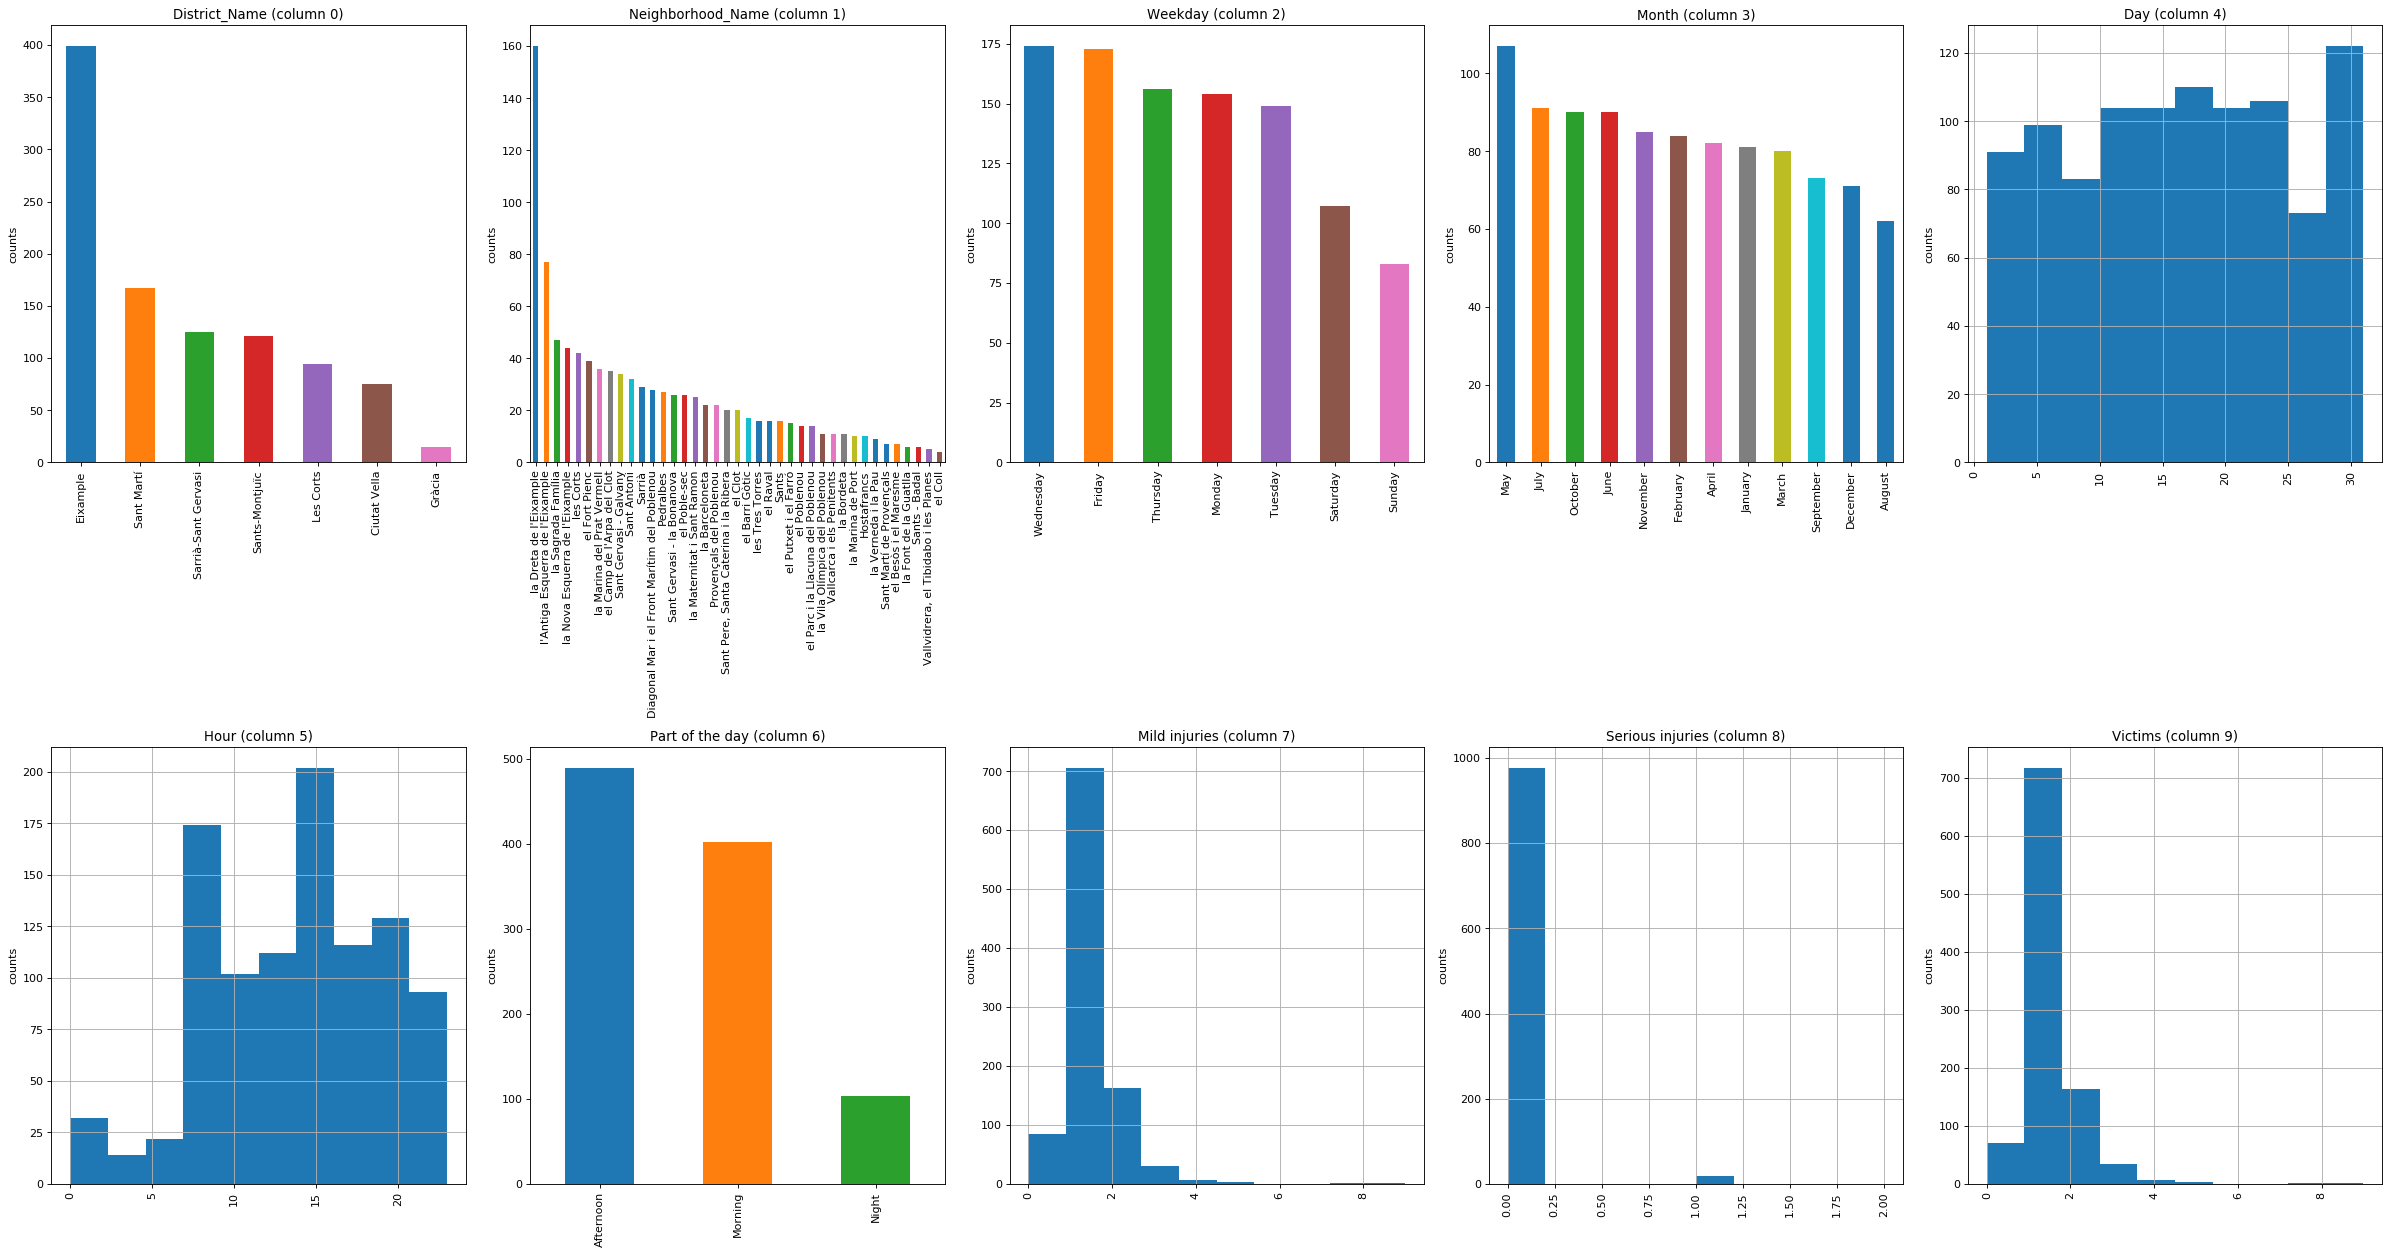

In [48]:
plotPerColumnDistribution(df1, 10, 5)

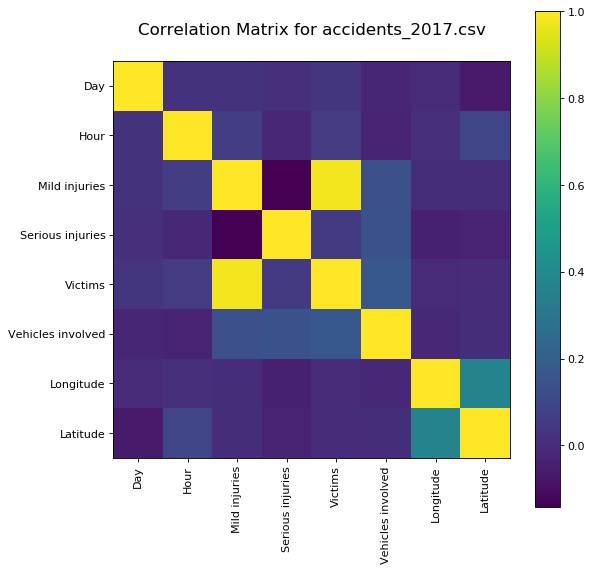

In [30]:
plotCorrelationMatrix(df1, 8)

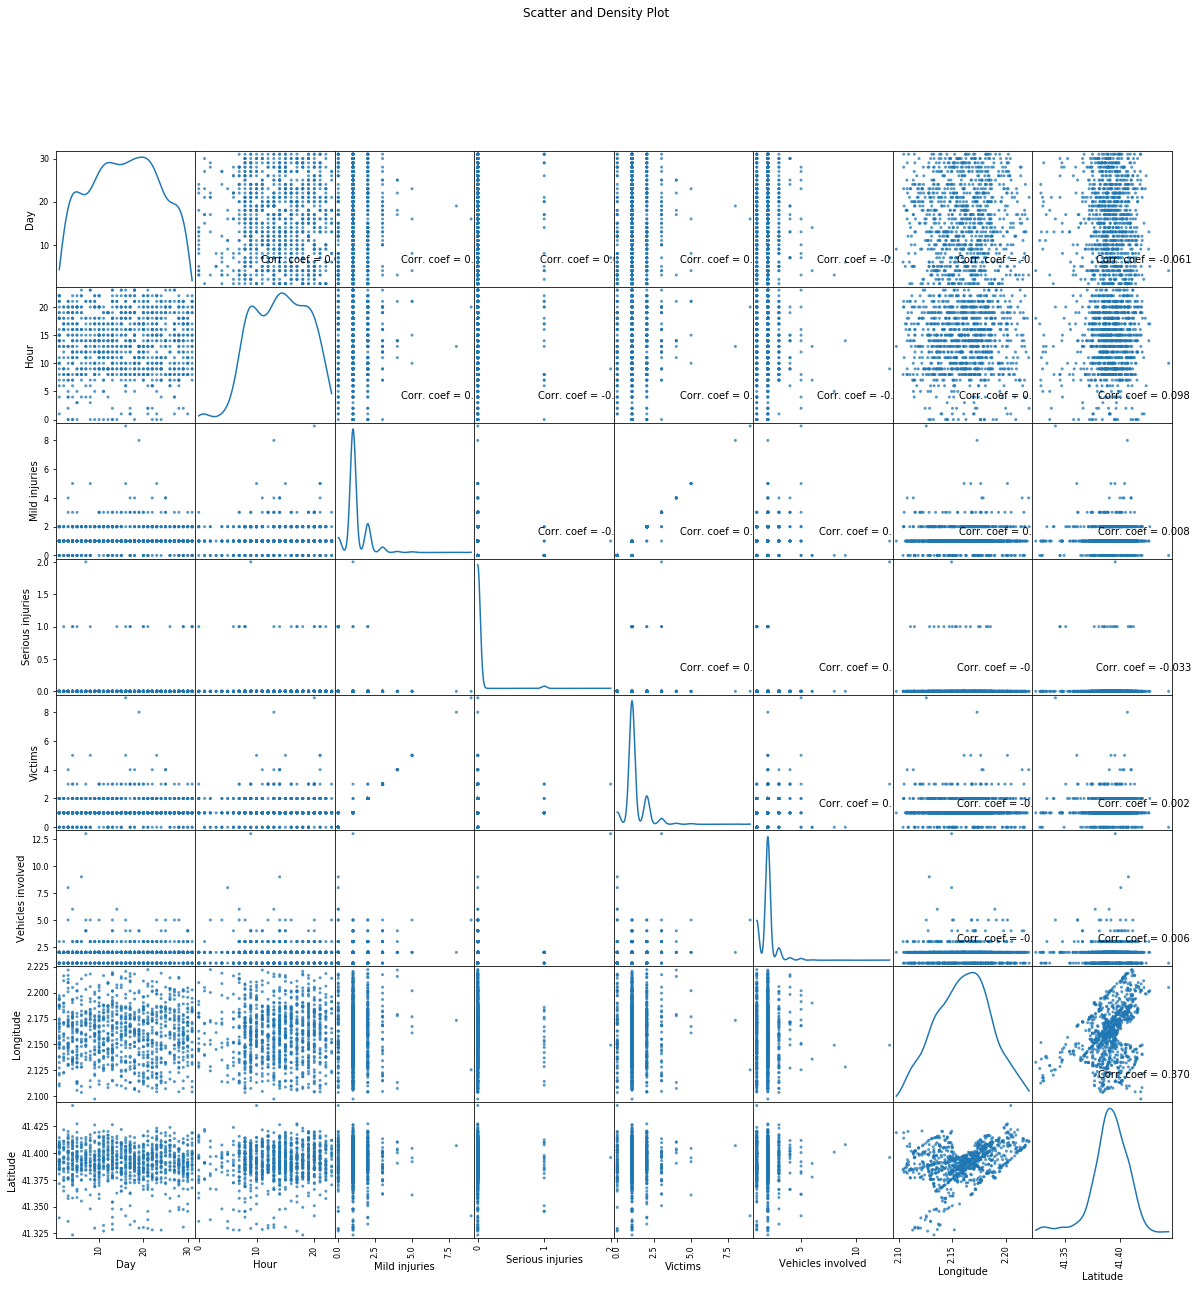

In [31]:
plotScatterMatrix(df1, 20, 10)